# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [17]:

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

# 1.Load Data

In [19]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [20]:
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
print(data.shape)
print(len(data))

(205, 26)
205


In [22]:
print(data.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


## 2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [23]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [25]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [26]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [27]:
#Fixing invalid values
#There seems to be some spelling error in the CarName column.

#maxda = mazda
#Nissan = nissan
#porsche = porcshce
#toyota = toyouta
#vokswagen = volkswagen = vw

def replace_name(a,b):
    data.CarName = data.CarName.str.replace(a,b)

In [28]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('100 ls','100ls')

In [29]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

data['fueltype'] = lblencoder.fit_transform(data['fueltype'])
data['aspiration'] = lblencoder.fit_transform(data['aspiration'])
data['carbody'] = lblencoder.fit_transform(data['carbody'])
data['drivewheel'] = lblencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = lblencoder.fit_transform(data['enginelocation'])

data['enginetype'] = lblencoder.fit_transform(data['enginetype'])
data['cylindernumber'] = lblencoder.fit_transform(data['cylindernumber'])
data['fuelsystem'] = lblencoder.fit_transform(data['fuelsystem'])

In [30]:
print(data['doornumber'].unique())

['two' 'four']


In [31]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [32]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
corr_data = data.corr()
#print(corr_data)

data_features = corr_data.index
#print(data[data_features].corr())
plt.figure(figsize= (28,28))
sns.heatmap(data[data_features].corr(),annot=True,cmap="YlGnBu")

In [33]:
Valueable_cols = ['drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'price']
Valueable_data = data[Valueable_cols]
Valueable_data.head()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower,price
0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,13495.0
1,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,16500.0
2,2,0,94.5,171.2,65.5,52.4,2823,152,5,2.68,154,16500.0
3,1,0,99.8,176.6,66.2,54.3,2337,109,5,3.19,102,13950.0
4,0,0,99.4,176.6,66.4,54.3,2824,136,5,3.19,115,17450.0


In [ ]:
Valueable_data.shape

In [ ]:
Valueable_data.head()

# 3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [34]:
x = (Valueable_data.loc[:,Valueable_data.columns !='price'])
y = (Valueable_data.loc[:,Valueable_data.columns =='price'])
#print(x)
#print(y)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=100)
#Normalize
mean = xtrain.mean(axis=0)
xtrain -= mean
std = xtrain.std(axis=0)
xtrain /= std
xtest -= mean
xtest /= std


In [35]:
x.head()
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


# 4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

# 5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 

In [38]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu',
                           input_shape=(xtrain.shape[1],)))
    model.add(Dense(10, activation='relu'))
    #model.add(Dense(8, activation='relu'))
    #model.add(Dense(6, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [39]:
build_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,429
Trainable params: 1,429
Non-trainable params: 0
_________________________________________________________________


# 6.Train the Model with Epochs (100) and validate it

In [ ]:
##k fold validation with relu
#k = 4
#num_val_samples = len(xtrain) // k
#num_epochs = 100
#all_scores = []
#
#for i in range(k):
#    print('processing fold #', i)
#    val_data = xtrain[i * num_val_samples: (i + 1) * num_val_samples]
#    val_targets = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
#    print('num_val_samples = ',num_val_samples,',val_data = xtrain[',i * num_val_samples,':',(i + 1) * num_val_samples,']')
#    partial_train_data = np.concatenate(
#        [xtrain[:i * num_val_samples],xtrain[(i + 1) * num_val_samples:]],axis=0)
#    partial_train_targets = np.concatenate([ytrain[:i * num_val_samples],
#                                            ytrain[(i + 1) * num_val_samples:]],axis=0)
#    model = build_model()
#    model.fit(partial_train_data, partial_train_targets,
#              epochs=num_epochs, batch_size=1, verbose=0)
#    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#    all_scores.append(val_mae)

In [ ]:
#all_scores

# 7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

In [40]:

k = 4
num_val_samples = len(xtrain) // k
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = xtrain[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
    print('num_val_samples = ',num_val_samples,',val_data = xtrain[',i * num_val_samples,':',(i + 1) * num_val_samples,']')
    partial_train_data = np.concatenate(
        [xtrain[:i * num_val_samples],xtrain[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([ytrain[:i * num_val_samples],
                                            ytrain[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
num_val_samples =  35 ,val_data = xtrain[ 0 : 35 ]
processing fold # 1
num_val_samples =  35 ,val_data = xtrain[ 35 : 70 ]
processing fold # 2
num_val_samples =  35 ,val_data = xtrain[ 70 : 105 ]
processing fold # 3
num_val_samples =  35 ,val_data = xtrain[ 105 : 140 ]


In [41]:
all_mae_histories

[[13252.7880859375,
  13246.0712890625,
  13233.716796875,
  13214.96875,
  13187.3056640625,
  13149.576171875,
  13101.0400390625,
  13038.6962890625,
  12963.6611328125,
  12870.181640625,
  12762.6064453125,
  12634.1669921875,
  12486.5361328125,
  12315.791015625,
  12122.8291015625,
  11903.419921875,
  11666.1845703125,
  11389.517578125,
  11100.9716796875,
  10792.1064453125,
  10458.1533203125,
  10091.068359375,
  9709.0673828125,
  9304.337890625,
  8910.7001953125,
  8471.86328125,
  8094.2802734375,
  7760.208984375,
  7452.681640625,
  7122.220703125,
  6763.23046875,
  6424.5947265625,
  6090.109375,
  5765.8017578125,
  5437.87939453125,
  5130.15185546875,
  4818.67138671875,
  4549.8134765625,
  4355.337890625,
  4237.345703125,
  4150.81201171875,
  4122.46142578125,
  4093.273681640625,
  4080.491943359375,
  4063.1455078125,
  4046.6259765625,
  4031.861572265625,
  4019.99951171875,
  4009.1396484375,
  3996.3447265625,
  3983.63623046875,
  3971.340087890625,
 

In [42]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
average_mae_history

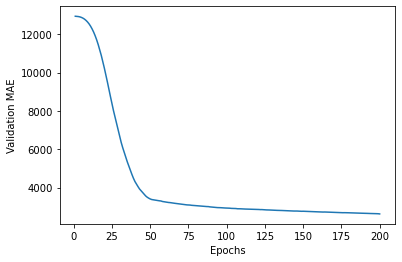

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
trainmodel=build_model()
.fit(xtrain,ytrain, batch_size=1,epochs=200)

In [ ]:
ytest.info()

# 8.Evaluation Step

In [46]:
model = build_model()

In [49]:
model.fit(xtrain, ytrain,epochs=200, batch_size=5, verbose=0)
test_mse_score, test_mae_score = model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 18ms/step - loss: 10229611.0000 - mae: 2636.5999


In [50]:
print('test_mse_score, test_mae_score ',test_mse_score, test_mae_score )

test_mse_score, test_mae_score  10229611.0 2636.599853515625


# 9.Prediction

In [54]:
y_predict = model.predict(xtrain)

In [52]:
print(xtest[0:1])
print('=====================')
print('ytest >> ',ytest.price[0:1])
print('ypredict >> ',y_predict[0:1])
print('=====================')


     drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  \
160   -0.517927       -0.083624  -0.473525  -0.564908 -0.650284  -0.226706   

     curbweight  enginesize  fuelsystem  boreratio  horsepower  
160   -0.817975    -0.65793   -1.049348  -0.449862   -0.819491  
ytest >>  160    7738.0
Name: price, dtype: float64
ypredict >>  [[7325.463]]
